In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
data=pd.read_csv('Advertising.csv')
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [52]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [53]:
data=data.drop(['Unnamed: 0'],axis=1)

In [54]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:>

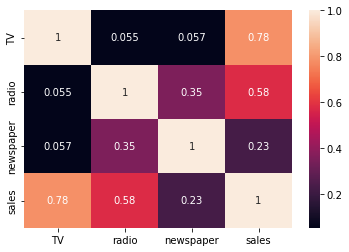

In [55]:
sns.heatmap(data.corr(),annot=True)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


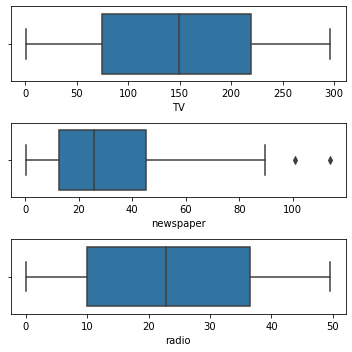

In [56]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'],ax=axs[0])
plt2 = sns.boxplot(data['newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['radio'], ax = axs[2])
plt.tight_layout()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales'>

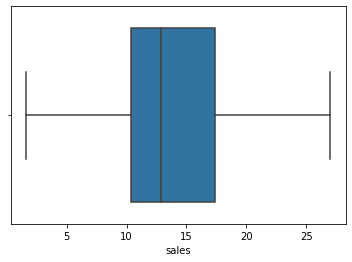

In [57]:
sns.boxplot(data['sales'])

In [60]:
x=data.drop(['sales'],axis=1)
y=data['sales']

In [61]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [62]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lm=LinearRegression()

In [70]:
lm.fit(x,y)

LinearRegression()

In [71]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [73]:
lm.intercept_

2.9388893694594067

In [74]:
y_pred=lm.predict(x_test)

In [75]:
y_pred

array([ 8.76480262, 14.64794093, 14.98951429, 18.36720534, 19.45441306,
        8.14651887, 10.57717411, 19.24986927,  7.88410649, 14.35827373,
       10.36684881, 15.33707782, 14.7405382 , 12.0370073 ,  6.12602215,
       18.53852096, 21.14027498, 13.21069202, 21.22757378, 24.13310013,
       11.59870739, 10.38419866, 19.26692307, 12.63121132, 16.94035021,
       15.17319554,  6.05162411, 23.24248685, 13.87595844, 14.76221142,
       19.67547632, 12.77458802, 23.40590052, 15.30509593, 20.37443008,
       15.6100386 , 12.33785482,  9.8272711 , 18.48695797,  7.83807642,
        9.12734958,  5.74215558,  9.99922965, 16.3600003 , 16.37766467,
       23.22495716, 20.52397441,  7.60769238, 20.80301059, 10.57712073,
       15.59378475, 17.59782951, 23.26086103, 12.4891591 , 18.13348698,
       19.15639616, 12.30767078, 22.25549161, 18.10076728, 17.1861428 ])

In [78]:
from sklearn import metrics

In [81]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1.5258491944687613

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9224509624556596